# DSCI-100 Project Proposal: Classifying Heart disease

### Introduction:
In this project, we are predicting the likelihood of an individual to have heart disease based on their age, cholesterol levels, and ST depression induced by exercise relative to rest. 
Heart disease refers to various conditions that affect the heart, including diseases related to the blood vessel, heartbeat frequency, heart muscles and heart valve. Most of the conditions can be prevented or treated with lifestyle changes. Anatomically, they are caused by atherosclerosis, the build-up of fatty deposit in the walls of the coronary arteries.
Accordingly, age and the likelihood of having a heart disease have a positive correlation as aging can cause changes to the blood vessels and heart. Cholesterol is a lipid that provides vital functions to the cells in the body, but high cholesterol level can create the fatty deposit. Lastly, ST depression refers to the findings on an electrocardiogram. A valid ECG finding for the identification of obstructive coronary atherosclerosis is exercise-induced ST segment depression. It has been linked to heart diseases.
The dataset that we are using is the Hungarian data, collected on March 15, 1990, reprocessed on July 23, 1996. The database originally contains 76 attributes, but all published experiments refer to using a subset of 14. 

References: Lanza, G. A., Mustilli, M., Sestito, A., Infusino, F., Sgueglia, G. A., & Crea, F. (2004, December). Diagnostic and prognostic value of St Segment Depression Limited to the recovery phase of exercise stress test. Heart (British Cardiac Society). Retrieved October 27, 2022, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1768611/ 
Mayo Foundation for Medical Education and Research. (2021, July 20). High cholesterol. Mayo Clinic. Retrieved October 27, 2022, from https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/symptoms-causes/syc-20350800 
Mayo Foundation for Medical Education and Research. (2022, August 25). Heart disease. Mayo Clinic. Retrieved October 27, 2022, from https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118 
U.S. Department of Health and Human Services. (n.d.). Heart health and aging. National Institute on Aging. Retrieved October 27, 2022, from https://www.nia.nih.gov/health/heart-health-and-aging 

### Data
Column names:
Here are the column names:
- age: age in years
- ca: number of major vessels (0-3)
- chol: serum cholestoral in mg/dl
- cp: chest pain type 
  - Value 1: typical angina
  - Value 2: atypical angina
  - Value 3: non-anginal pain
  - Value 4: asymptomatic
- exang: exercise induced angina 
  - Value 0: no
  - Value 1: yes
- fbs: (fasting blood sugar > 120 mg/dl) 
  - Value 0: false
  - Value 1: true
- num: diagnosis of heart disease 
  - Value 0: < 50% diameter narrowing
  - Value 1: > 50% diameter narrowing
- oldpeak: ST depression induced by exercise relative to rest
- restecg: resting electrocardiographic results
  - Value 0: normal
  - Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
  - Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
- sex: sex
  - Value 0 = female
  - Value 1 = male
- slope: the slope of the peak exercise ST segment
  - Value 1: upsloping
  - Value 2: flat
  - Value 3: downsloping
- thal
  - Value 3: normal
  - Value 6: fixed defect
  - Value 7: reverseable defect
- thalach: Maximum heart rate achieved
- trestbps: resting blood pressure (mm Hg)

Dataset retrieved from: https://archive.ics.uci.edu/ml/datasets/heart+Disease

# Preliminary exploratory data analysis

In [1]:
# Load all libraries
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
# Load the dataset and set it's column names accordingly:
heart_all_data <- read_delim("data/reprocessed.hungarian.data", delim=" ",
                  col_names = c("age", "sex", "cp", "trestbps", "chol", 
                              "fbs", "restecg", "thalach", "exang", 
                              "oldpeak", "slope", "ca", "thal", 
                              "num"))
heart_all_data

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: " "
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
40,1,2,140,289,0,0,172,0,0,-9,-9,-9,0
49,0,3,160,180,0,0,156,0,1,2,-9,-9,1
37,1,2,130,283,0,1,98,0,0,-9,-9,-9,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
48,1,3,110,211,0,0,138,0,0,-9,-9,6,0
47,0,2,140,257,0,0,135,0,1,1,-9,-9,0
53,1,4,130,182,0,0,148,0,0,-9,-9,-9,0


In [3]:
# Select and mutate columns that we're interested in into their appropriate datatypes
# Age, oldpeak, cholestrol

heart_data <- heart_all_data |>
              select(age, oldpeak, chol, num) |>
              mutate(num = case_when(num>=1 ~ 1,
                                    TRUE ~ 0)) |>
              mutate(age = as.integer(age), oldpeak = as.double(oldpeak), chol = as.integer(chol), num = as.factor(num))
heart_data

age,oldpeak,chol,num
<int>,<dbl>,<int>,<fct>
40,0,289,0
49,1,180,1
37,0,283,0
⋮,⋮,⋮,⋮
48,0,211,0
47,1,257,0
53,0,182,0


## Splitting the data into training and testing set
We're splitting the data where 75% will be training and 25% will be testing

In [4]:
set.seed(100)
heart_split <- initial_split(heart_data, prop = 0.7, strata = num)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split)

In [5]:
# Summary of the dataset
summary(heart_training)

      age          oldpeak           chol       num    
 Min.   :29.0   Min.   :0.000   Min.   : -9.0   0:131  
 1st Qu.:41.0   1st Qu.:0.000   1st Qu.:198.0   1: 74  
 Median :48.0   Median :0.000   Median :231.0          
 Mean   :47.1   Mean   :0.538   Mean   :227.2          
 3rd Qu.:53.0   3rd Qu.:1.000   3rd Qu.:277.0          
 Max.   :66.0   Max.   :5.000   Max.   :491.0          

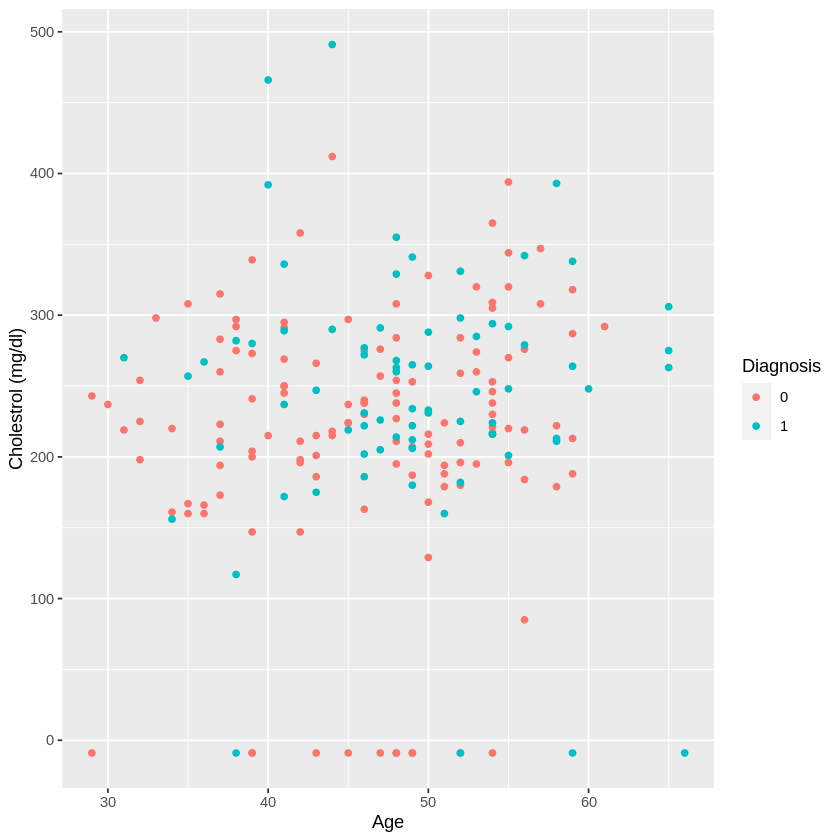

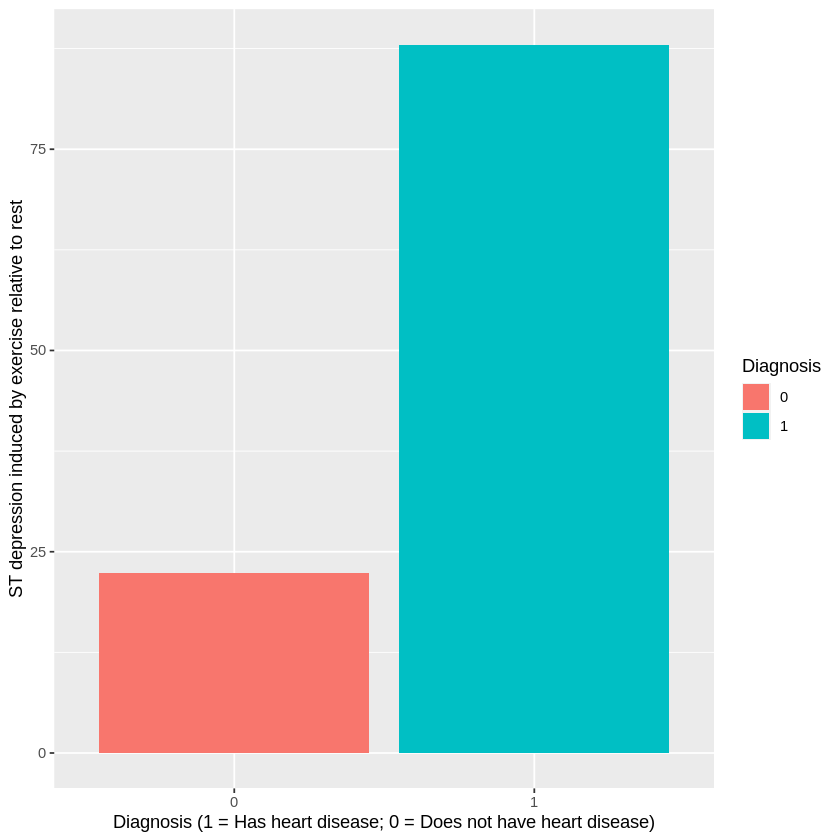

In [14]:
# Plotting the dataset based on desired variables
firstPlot <- heart_training |>
             ggplot(aes(x = age, y = chol, color = num)) +
             geom_point() +
             labs(x = "Age", y = "Cholestrol (mg/dl)", color = "Diagnosis")
secondPlot <- heart_training |>
             ggplot(aes(x=num, y=oldpeak, fill=num)) +
             geom_bar(stat = "identity") +
             labs(x = "Diagnosis (1 = Has heart disease; 0 = Does not have heart disease)",
                  y = "ST depression induced by exercise relative to rest",
                  fill = "Diagnosis")
# Relation between Age and Heart disease

firstPlot
secondPlot

# Methods
The data columns we will use are age, chol (serum cholesterol), oldpeak (ST depression induced by exercise relative to rest), and num (diagnosis of heart disease). After tidying our data and splitting it into training and testing sets, we will build a knn classification model with the training data, tuning to determine the best value of K. 
One visualization we will create is a bar graph with the variable oldpeak on the y-axis vs. num on the x-axis. 


# Expected Outcome & Significance
We expect to find heart disease to have positive correlations with age and unhealthy lifestyles. The findings could lead to finding ways to predict and prevent heart disease.
